# Solucion Ejerccios Analíticas 

In [ ]:
# Nececitamos a Pandas entoces tremos esa libreria
import findspark
findspark.init()

import pandas as pd
import pyspark

In [ ]:
pip install seaborn

In [ ]:
pip install pyspark

In [ ]:
# Nececitamos los siguietes recursos
from pyspark.sql import functions as f
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

get_ipython().run_line_magic('matplotlib', 'inline')
# Cuando se ejecuta este comando, se configura la visualización de gráficos 
# generados por matplotlib para que muestren directamente dentro del cuaderno 

In [ ]:
from pyspark.sql import SparkSession

spark = SparkSession.builder\
        .master("local[*]")\
        .appName('PySpark_Analiticas')\
        .getOrCreate()

In [ ]:
from pyspark.sql.types import *

data_schema = [
               StructField('_c0', IntegerType(), True),
               StructField('symbol', StringType(), True),
               StructField('data', DateType(), True),
               StructField('open', DoubleType(), True),
               StructField('high', DoubleType(), True),
               StructField('low', DoubleType(), True),
               StructField('close', DoubleType(), True),
               StructField('volume', IntegerType(), True),
               StructField('adjusted', DoubleType(), True),
               StructField('market.cap', StringType(), True),
               StructField('sector', StringType(), True),
               StructField('industry', StringType(), True),
               StructField('exchange', StringType(), True),
            ]

final_struc = StructType(fields=data_schema)

In [ ]:
data = spark.read.csv(
    'C:/data/stocks_price_final.csv',
    sep = ',',
    header = True,
    schema = final_struc
    )

In [19]:
data.printSchema()

root
 |-- _c0: integer (nullable = true)
 |-- symbol: string (nullable = true)
 |-- data: date (nullable = true)
 |-- open: double (nullable = true)
 |-- high: double (nullable = true)
 |-- low: double (nullable = true)
 |-- close: double (nullable = true)
 |-- volume: integer (nullable = true)
 |-- adjusted: double (nullable = true)
 |-- sector: string (nullable = true)
 |-- industry: string (nullable = true)
 |-- exchange: string (nullable = true)



**Eliminar o renombrar la variable market.cap**

In [ ]:
data = data.drop('market.cap')

**Filtrar los datos donde el valor de “open” es nulo y eliminar esas filas**

In [26]:
data.filter("open is null").show()

+----+------+----------+----+----+----+-----+------+--------+-------------+--------------------+--------+
| _c0|symbol|      data|open|high| low|close|volume|adjusted|       sector|            industry|exchange|
+----+------+----------+----+----+----+-----+------+--------+-------------+--------------------+--------+
|4378|  KRKR|2020-05-11|NULL|NULL|NULL| NULL|  NULL|    NULL|Miscellaneous|   Business Services|  NASDAQ|
|5747|  NMTR|2020-01-23|NULL|NULL|NULL| NULL|  NULL|    NULL|  Health Care|Major Pharmaceuti...|  NASDAQ|
|5748|  NMTR|2020-01-24|NULL|NULL|NULL| NULL|  NULL|    NULL|  Health Care|Major Pharmaceuti...|  NASDAQ|
|5749|  NMTR|2020-01-27|NULL|NULL|NULL| NULL|  NULL|    NULL|  Health Care|Major Pharmaceuti...|  NASDAQ|
|5750|  NMTR|2020-01-28|NULL|NULL|NULL| NULL|  NULL|    NULL|  Health Care|Major Pharmaceuti...|  NASDAQ|
|5751|  NMTR|2020-01-29|NULL|NULL|NULL| NULL|  NULL|    NULL|  Health Care|Major Pharmaceuti...|  NASDAQ|
|5752|  NMTR|2020-01-30|NULL|NULL|NULL| NULL| 

In [ ]:
#Notas para tratamiento datos perdidos o incompletos ====
#data.na.drop(): Elimina filas con cualquier valor nulo
#data.na.drop(how='all'): Elimina solo filas donde TODOS los valores son nulos
#data.na.drop(subset=['columna']): Elimina filas con nulos solo en esa columna específica

data.na.drop()

In [20]:
data.show(10)

+---+------+----------+---------+---------+---------+---------+-------+---------+-------------+--------------------+--------+
|_c0|symbol|      data|     open|     high|      low|    close| volume| adjusted|       sector|            industry|exchange|
+---+------+----------+---------+---------+---------+---------+-------+---------+-------------+--------------------+--------+
|  1|   TXG|2019-09-12|     54.0|     58.0|     51.0|    52.75|7326300|    52.75|Capital Goods|Biotechnology: La...|  NASDAQ|
|  2|   TXG|2019-09-13|    52.75|   54.355|49.150002|    52.27|1025200|    52.27|Capital Goods|Biotechnology: La...|  NASDAQ|
|  3|   TXG|2019-09-16|52.450001|     56.0|52.009998|55.200001| 269900|55.200001|Capital Goods|Biotechnology: La...|  NASDAQ|
|  4|   TXG|2019-09-17|56.209999|60.900002|   55.423|56.779999| 602800|56.779999|Capital Goods|Biotechnology: La...|  NASDAQ|
|  5|   TXG|2019-09-18|56.849998|    62.27|55.650002|     62.0|1589600|     62.0|Capital Goods|Biotechnology: La...|  

**Calcular el mínimo y máximo de data, open, close y adjusted**

In [ ]:
from pyspark.sql.functions import col, min, max, avg, lit

data_transf = data.groupBy("sector") \
    .agg(min("data").alias("From"), 
         max("data").alias("To"), 
         
         min("open").alias("Minimum Opening"),
         max("open").alias("Maximum Opening"), 

         min("close").alias("Minimum Closing"), 
         max("close").alias("Maximum Closing"),  

         min("adjusted").alias("Minimum Adjusted Closing"), 
         max("adjusted").alias("Maximum Adjusted Closing"), 

      )

**Convertir un DataFrame de Spark en un DataFrame de pandas**

In [21]:
data_transf.toPandas()

,sector,From,To,Minimum Opening,Maximum Opening,Minimum Closing,Maximum Closing,Minimum Adjusted Closing,Maximum Adjusted Closing
0,Miscellaneous,2019-01-02,2020-07-22,0.147,1.059990e+03,0.1361,1.035830e+03,0.136100,1.035830e+03
1,Health Care,2019-01-02,2020-07-22,0.072,1.860000e+05,0.0710,1.870000e+05,0.071000,1.870000e+05
2,Public Utilities,2019-01-02,2020-07-22,0.331,2.800000e+02,0.3250,2.822200e+02,0.325000,2.806739e+02
3,Energy,2019-01-02,2020-07-22,0.100,9.050000e+02,0.0900,9.010400e+02,0.090000,8.790570e+02
4,Consumer Non-Durables,2019-01-02,2020-07-22,0.120,6.550000e+02,0.1200,6.641300e+02,0.120000,6.641300e+02
5,Finance,2019-01-02,2020-07-22,0.250,1.336930e+03,0.2700,1.341080e+03,0.270000,1.341080e+03
6,Basic Industries,2019-01-02,2020-07-22,0.230,1.601682e+08,0.2300,1.583766e+08,0.230000,1.572494e+08
7,Capital Goods,2019-01-02,2020-07-22,0.130,4.025000e+03,0.1200,4.037770e+03,-1.230099,4.037770e+03
8,Technology,2019-01-02,2020-07-22,0.140,2.704000e+03,0.1300,2.736000e+03,0.130000,2.736000e+03
9,Consumer Services,2019-01-02,2020-07-22,0.100,1.543750e+04,0.1340,1.984375e+04,0.134000,1.984375e+04


**Calcular la media de las variables open, close y adjusted por industria**

In [22]:
data_df = data.select(['industry', 'open', 'close', 'adjusted']).groupBy('industry').mean().toPandas()
data_df

,industry,avg(open),avg(close),avg(adjusted)
0,Finance/Investors Services,5.134402,5.136631,4.991354
1,Miscellaneous,16.385883,16.359879,16.148959
2,Investment Bankers/Brokers/Service,58.950581,58.983086,58.157837
3,Food Distributors,43.274509,43.273178,42.910476
4,Broadcasting,24.916787,24.917388,24.699102
...,...,...,...,...
130,Wholesale Distributors,16.608839,16.602717,16.602717
131,Electronics Distribution,6.428699,6.430408,6.377569
132,Tools/Hardware,70.412755,70.475944,69.670351
133,Tobacco,32.467832,32.455689,32.213047


**Generar un gráfico de líneas donde se muestre la media de open por industria**

In [23]:
data_df[['industry', 'avg(open)']].plot()

<Axes: >

In [25]:
print(data_df.dtypes)

industry          object
avg(open)        float64
avg(close)       float64
avg(adjusted)    float64
dtype: object


In [27]:
corr = data_df.select_dtypes(include=['float64', 'int64']).corr()

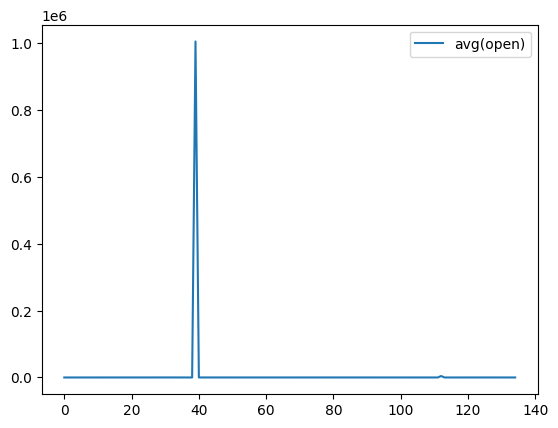

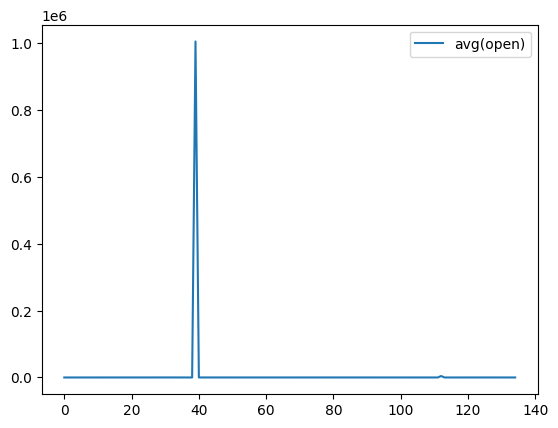

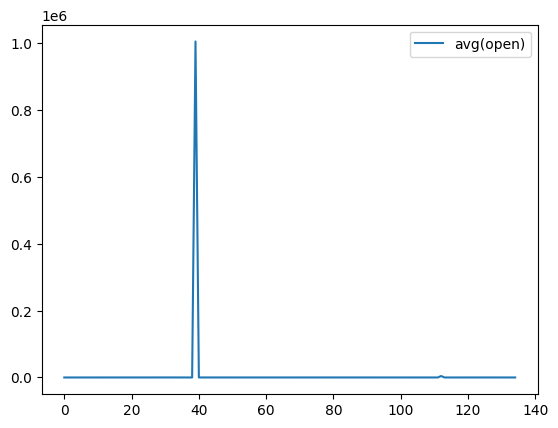

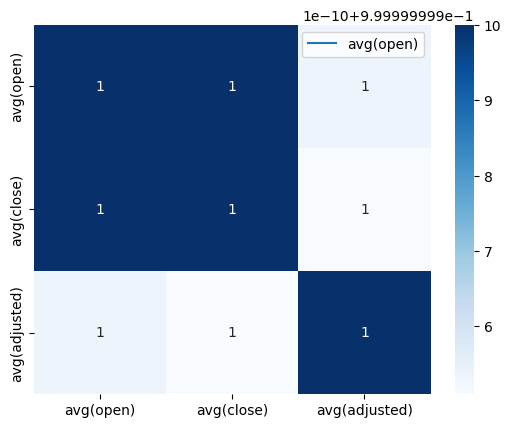

In [28]:
import seaborn as sb
import matplotlib.pyplot as plt

sb.heatmap(corr, cmap="Blues", annot=True)
plt.show()


In [29]:
# Parquet
data.select(['data', 'open', 'close', 'adjusted'])\
    .write.save('dataset.parquet', format='parquet')